# Multiclass Classification

## Setup

In [2]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Classifying-the-MNIST"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Classifying-the-MNIST


In [3]:
!pip install -r requirements.txt

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

## Data splitting

In [5]:
X_train, X_test = mnist.data[:6000], mnist.data[6000:]
y_train, y_test = mnist.target[:6000], mnist.target[6000:]

## OvO (one verse one)

In [6]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [7]:
some_digit = X_train[0]
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [10]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [14]:
prediction_id = some_digit_scores.argmax()
print(prediction_id)
print(svm_clf.classes_)
svm_clf.classes_[prediction_id]

5
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


'5'

## OvR

In [15]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [16]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [20]:
print(len(ovr_clf.estimators_))

10


In [29]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8565, 0.8715, 0.8635])

## Scaling inputs

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,scoring="accuracy")

array([0.8705, 0.8985, 0.8925])

## Confusion Matrices

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

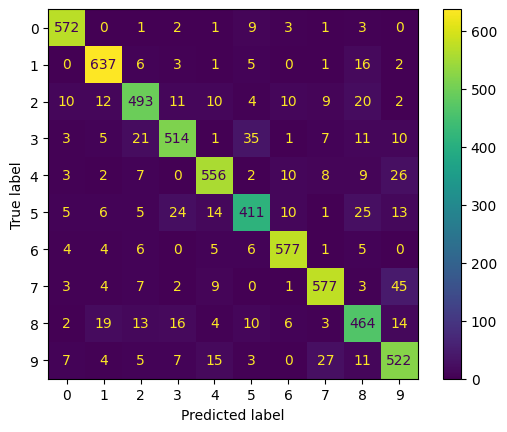

In [40]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

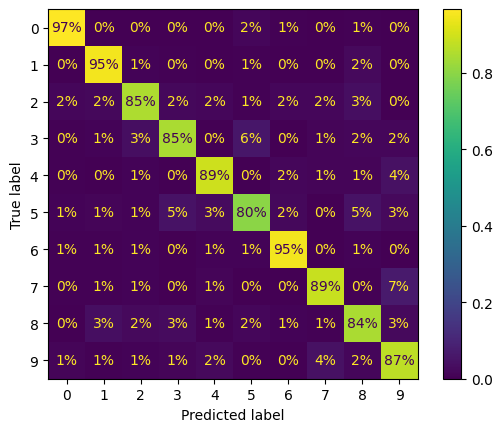

In [53]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")

plt.show()

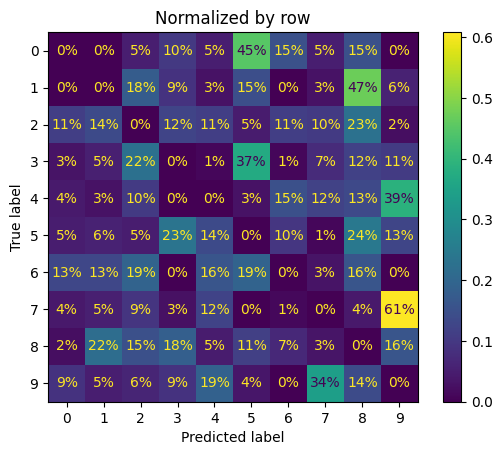

In [56]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.title("Normalized by row")
plt.show()

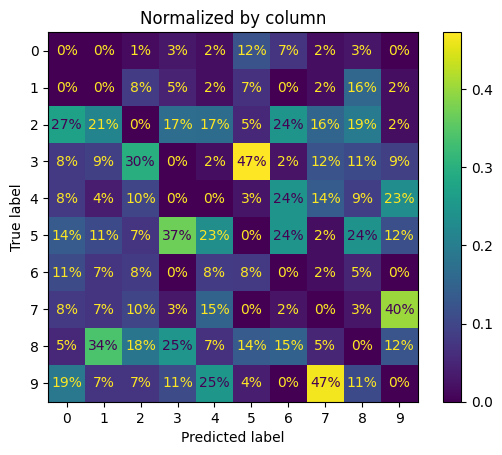

In [58]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%")
plt.title("Normalized by column")
plt.show()

## Analyze a common misclassification (7 and 9)

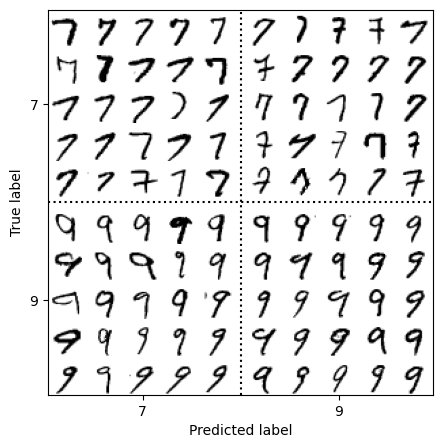

In [71]:
X_77 = X_train[(y_train == "7") & (y_train_pred == "7")]
X_79 = X_train[(y_train == "7") & (y_train_pred == "9")]
X_97 = X_train[(y_train == "9") & (y_train_pred == "7")]
X_99 = X_train[(y_train == "9") & (y_train_pred == "9")]

size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_77, (0, 1)), (X_79, (1, 1)),
                                        (X_97, (0, 0)), (X_99, (1, 0))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary", extent=(x, x+1, y, y+1))
plt.xticks([size / 2, size + pad + size / 2], ["7", "9"])
plt.yticks([size / 2, size + pad + size / 2], ["9", "7"])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()